In [2]:
import numpy as np
import pandas as pd
import os
import time
import random
import matplotlib.pyplot as plt 
import seaborn as sns

from glob import glob
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from skimage.feature import hog

import PIL
import cv2
import pickle

In [3]:
veri_path = '../input/gtsrb-german-traffic-sign'
train_path = 'Train'
test_path = '../input/gtsrb-german-traffic-sign/'
number_of_class = len(os.listdir(train_path))

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../input/gtsrb-german-traffic-sign/Train'

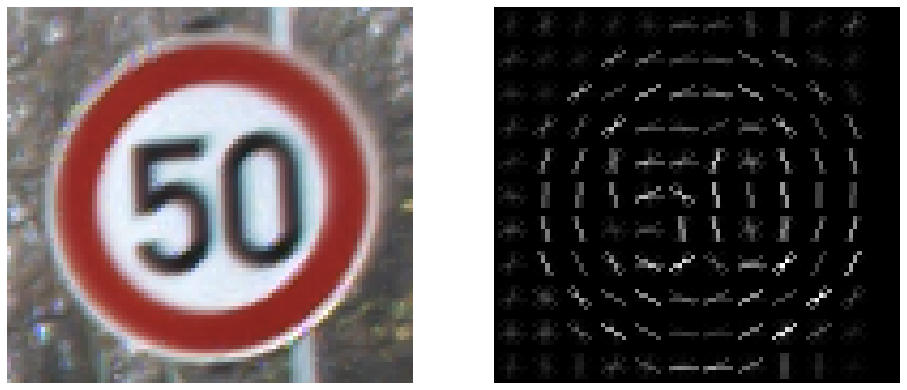

In [4]:
example_image = np.asarray(PIL.Image.open("Train/2/00002_00038_00026.png"))
hog_features,visualized = hog(example_image,orientations=9,pixels_per_cell=(8,8),
                              cells_per_block=(2,2),
                              visualize=True,
                              multichannel=True
                             )

fig = plt.figure(figsize=(16,16))
fig.add_subplot(1,2,1)
plt.imshow(example_image)
plt.axis("off")
fig.add_subplot(1,2,2)
plt.imshow(visualized,cmap="gray")
plt.axis("off")
fig.savefig('hog.png')
plt.show()

In [8]:
pos_images = []
neg_images = []

pos_labels = []
neg_labels = []

start = time.time()

for i in range(43):
    path = 'Train/' + str(i)
    images_path = os.listdir(path)
    for img_path in images_path:
        try:
            img = np.asarray(PIL.Image.open(path + '/' + img_path))
            img = cv2.cvtColor(cv2.resize(img,(32,32)),cv2.COLOR_RGB2GRAY)
            img = hog(img,orientations=9,pixels_per_cell=(8,8),
                      cells_per_block=(2,2)
                     )
            pos_images.append(img)
            pos_labels.append(i)
        except:
            print("Error loading image")
            
print("Number of postive img: ", len(pos_images))
    
for class_path in glob("natural_images"+"/*"):
    paths = glob(class_path+"/*")
    for neg_path in paths:
        img = np.asarray(PIL.Image.open(neg_path))
        img = cv2.cvtColor(cv2.resize(img,(32,32)),cv2.COLOR_RGB2GRAY)
        img = hog(img,orientations=9,pixels_per_cell=(8,8),
                  cells_per_block=(2,2)
                 )
        neg_images.append(img)
        neg_labels.append(0)
        
print("Number of negative img: ", len(neg_images))
    
x = np.asarray(pos_images + neg_images)
y = np.asarray(list(pos_labels) + list(neg_labels))
    
processTime = round(time.time()-start,2)
print("Reading images and extracting features has taken {} seconds".format(processTime))

print("Shape of image set",x.shape)
print("Shape of labels",y.shape)

Number of postive img:  39209
Number of negative img:  6899
Reading images and extracting features has taken 87.02 seconds
Shape of image set (46108, 324)
Shape of labels (46108,)


In [9]:
svc = SVC()
start = time.time()

svc.fit(x,y)

processTime = round(time.time()-start,2)

print("Training process has taken {} seconds".format(processTime))

Training process has taken 70.27 seconds


In [12]:
test = pd.read_csv('Test.csv')
# test = test.sample(1000)
folder_test_x = []
folder_test_y = test["ClassId"].values
images_path = test["Path"].values

for img_path in images_path:
    try:
        img = np.asarray(PIL.Image.open(img_path))
        img = cv2.cvtColor(cv2.resize(img,(32,32)),cv2.COLOR_RGB2GRAY)
        img = hog(img,orientations=9,pixels_per_cell=(8,8),
                  cells_per_block=(2,2)
                 )
        folder_test_x.append(img)
    except:
        print("Error loading image")
            
print("Number of postive img: ", len(folder_test_x))
print("Number of result: ", len(folder_test_y))



Test/00000.png
Test/00001.png
Test/00002.png
Test/00003.png
Test/00004.png
Test/00005.png
Test/00006.png
Test/00007.png
Test/00008.png
Test/00009.png
Test/00010.png
Test/00011.png
Test/00012.png
Test/00013.png
Test/00014.png
Test/00015.png
Test/00016.png
Test/00017.png
Test/00018.png
Test/00019.png
Test/00020.png
Test/00021.png
Test/00022.png
Test/00023.png
Test/00024.png
Test/00025.png
Test/00026.png
Test/00027.png
Test/00028.png
Test/00029.png
Test/00030.png
Test/00031.png
Test/00032.png
Test/00033.png
Test/00034.png
Test/00035.png
Test/00036.png
Test/00037.png
Test/00038.png
Test/00039.png
Test/00040.png
Test/00041.png
Test/00042.png
Test/00043.png
Test/00044.png
Test/00045.png
Test/00046.png
Test/00047.png
Test/00048.png
Test/00049.png
Test/00050.png
Test/00051.png
Test/00052.png
Test/00053.png
Test/00054.png
Test/00055.png
Test/00056.png
Test/00057.png
Test/00058.png
Test/00059.png
Test/00060.png
Test/00061.png
Test/00062.png
Test/00063.png
Test/00064.png
Test/00065.png
Test/00066

Test/00659.png
Test/00660.png
Test/00661.png
Test/00662.png
Test/00663.png
Test/00664.png
Test/00665.png
Test/00666.png
Test/00667.png
Test/00668.png
Test/00669.png
Test/00670.png
Test/00671.png
Test/00672.png
Test/00673.png
Test/00674.png
Test/00675.png
Test/00676.png
Test/00677.png
Test/00678.png
Test/00679.png
Test/00680.png
Test/00681.png
Test/00682.png
Test/00683.png
Test/00684.png
Test/00685.png
Test/00686.png
Test/00687.png
Test/00688.png
Test/00689.png
Test/00690.png
Test/00691.png
Test/00692.png
Test/00693.png
Test/00694.png
Test/00695.png
Test/00696.png
Test/00697.png
Test/00698.png
Test/00699.png
Test/00700.png
Test/00701.png
Test/00702.png
Test/00703.png
Test/00704.png
Test/00705.png
Test/00706.png
Test/00707.png
Test/00708.png
Test/00709.png
Test/00710.png
Test/00711.png
Test/00712.png
Test/00713.png
Test/00714.png
Test/00715.png
Test/00716.png
Test/00717.png
Test/00718.png
Test/00719.png
Test/00720.png
Test/00721.png
Test/00722.png
Test/00723.png
Test/00724.png
Test/00725

Test/01246.png
Test/01247.png
Test/01248.png
Test/01249.png
Test/01250.png
Test/01251.png
Test/01252.png
Test/01253.png
Test/01254.png
Test/01255.png
Test/01256.png
Test/01257.png
Test/01258.png
Test/01259.png
Test/01260.png
Test/01261.png
Test/01262.png
Test/01263.png
Test/01264.png
Test/01265.png
Test/01266.png
Test/01267.png
Test/01268.png
Test/01269.png
Test/01270.png
Test/01271.png
Test/01272.png
Test/01273.png
Test/01274.png
Test/01275.png
Test/01276.png
Test/01277.png
Test/01278.png
Test/01279.png
Test/01280.png
Test/01281.png
Test/01282.png
Test/01283.png
Test/01284.png
Test/01285.png
Test/01286.png
Test/01287.png
Test/01288.png
Test/01289.png
Test/01290.png
Test/01291.png
Test/01292.png
Test/01293.png
Test/01294.png
Test/01295.png
Test/01296.png
Test/01297.png
Test/01298.png
Test/01299.png
Test/01300.png
Test/01301.png
Test/01302.png
Test/01303.png
Test/01304.png
Test/01305.png
Test/01306.png
Test/01307.png
Test/01308.png
Test/01309.png
Test/01310.png
Test/01311.png
Test/01312

Test/01834.png
Test/01835.png
Test/01836.png
Test/01837.png
Test/01838.png
Test/01839.png
Test/01840.png
Test/01841.png
Test/01842.png
Test/01843.png
Test/01844.png
Test/01845.png
Test/01846.png
Test/01847.png
Test/01848.png
Test/01849.png
Test/01850.png
Test/01851.png
Test/01852.png
Test/01853.png
Test/01854.png
Test/01855.png
Test/01856.png
Test/01857.png
Test/01858.png
Test/01859.png
Test/01860.png
Test/01861.png
Test/01862.png
Test/01863.png
Test/01864.png
Test/01865.png
Test/01866.png
Test/01867.png
Test/01868.png
Test/01869.png
Test/01870.png
Test/01871.png
Test/01872.png
Test/01873.png
Test/01874.png
Test/01875.png
Test/01876.png
Test/01877.png
Test/01878.png
Test/01879.png
Test/01880.png
Test/01881.png
Test/01882.png
Test/01883.png
Test/01884.png
Test/01885.png
Test/01886.png
Test/01887.png
Test/01888.png
Test/01889.png
Test/01890.png
Test/01891.png
Test/01892.png
Test/01893.png
Test/01894.png
Test/01895.png
Test/01896.png
Test/01897.png
Test/01898.png
Test/01899.png
Test/01900

Test/02416.png
Test/02417.png
Test/02418.png
Test/02419.png
Test/02420.png
Test/02421.png
Test/02422.png
Test/02423.png
Test/02424.png
Test/02425.png
Test/02426.png
Test/02427.png
Test/02428.png
Test/02429.png
Test/02430.png
Test/02431.png
Test/02432.png
Test/02433.png
Test/02434.png
Test/02435.png
Test/02436.png
Test/02437.png
Test/02438.png
Test/02439.png
Test/02440.png
Test/02441.png
Test/02442.png
Test/02443.png
Test/02444.png
Test/02445.png
Test/02446.png
Test/02447.png
Test/02448.png
Test/02449.png
Test/02450.png
Test/02451.png
Test/02452.png
Test/02453.png
Test/02454.png
Test/02455.png
Test/02456.png
Test/02457.png
Test/02458.png
Test/02459.png
Test/02460.png
Test/02461.png
Test/02462.png
Test/02463.png
Test/02464.png
Test/02465.png
Test/02466.png
Test/02467.png
Test/02468.png
Test/02469.png
Test/02470.png
Test/02471.png
Test/02472.png
Test/02473.png
Test/02474.png
Test/02475.png
Test/02476.png
Test/02477.png
Test/02478.png
Test/02479.png
Test/02480.png
Test/02481.png
Test/02482

Test/02981.png
Test/02982.png
Test/02983.png
Test/02984.png
Test/02985.png
Test/02986.png
Test/02987.png
Test/02988.png
Test/02989.png
Test/02990.png
Test/02991.png
Test/02992.png
Test/02993.png
Test/02994.png
Test/02995.png
Test/02996.png
Test/02997.png
Test/02998.png
Test/02999.png
Test/03000.png
Test/03001.png
Test/03002.png
Test/03003.png
Test/03004.png
Test/03005.png
Test/03006.png
Test/03007.png
Test/03008.png
Test/03009.png
Test/03010.png
Test/03011.png
Test/03012.png
Test/03013.png
Test/03014.png
Test/03015.png
Test/03016.png
Test/03017.png
Test/03018.png
Test/03019.png
Test/03020.png
Test/03021.png
Test/03022.png
Test/03023.png
Test/03024.png
Test/03025.png
Test/03026.png
Test/03027.png
Test/03028.png
Test/03029.png
Test/03030.png
Test/03031.png
Test/03032.png
Test/03033.png
Test/03034.png
Test/03035.png
Test/03036.png
Test/03037.png
Test/03038.png
Test/03039.png
Test/03040.png
Test/03041.png
Test/03042.png
Test/03043.png
Test/03044.png
Test/03045.png
Test/03046.png
Test/03047

Test/03619.png
Test/03620.png
Test/03621.png
Test/03622.png
Test/03623.png
Test/03624.png
Test/03625.png
Test/03626.png
Test/03627.png
Test/03628.png
Test/03629.png
Test/03630.png
Test/03631.png
Test/03632.png
Test/03633.png
Test/03634.png
Test/03635.png
Test/03636.png
Test/03637.png
Test/03638.png
Test/03639.png
Test/03640.png
Test/03641.png
Test/03642.png
Test/03643.png
Test/03644.png
Test/03645.png
Test/03646.png
Test/03647.png
Test/03648.png
Test/03649.png
Test/03650.png
Test/03651.png
Test/03652.png
Test/03653.png
Test/03654.png
Test/03655.png
Test/03656.png
Test/03657.png
Test/03658.png
Test/03659.png
Test/03660.png
Test/03661.png
Test/03662.png
Test/03663.png
Test/03664.png
Test/03665.png
Test/03666.png
Test/03667.png
Test/03668.png
Test/03669.png
Test/03670.png
Test/03671.png
Test/03672.png
Test/03673.png
Test/03674.png
Test/03675.png
Test/03676.png
Test/03677.png
Test/03678.png
Test/03679.png
Test/03680.png
Test/03681.png
Test/03682.png
Test/03683.png
Test/03684.png
Test/03685

Test/04222.png
Test/04223.png
Test/04224.png
Test/04225.png
Test/04226.png
Test/04227.png
Test/04228.png
Test/04229.png
Test/04230.png
Test/04231.png
Test/04232.png
Test/04233.png
Test/04234.png
Test/04235.png
Test/04236.png
Test/04237.png
Test/04238.png
Test/04239.png
Test/04240.png
Test/04241.png
Test/04242.png
Test/04243.png
Test/04244.png
Test/04245.png
Test/04246.png
Test/04247.png
Test/04248.png
Test/04249.png
Test/04250.png
Test/04251.png
Test/04252.png
Test/04253.png
Test/04254.png
Test/04255.png
Test/04256.png
Test/04257.png
Test/04258.png
Test/04259.png
Test/04260.png
Test/04261.png
Test/04262.png
Test/04263.png
Test/04264.png
Test/04265.png
Test/04266.png
Test/04267.png
Test/04268.png
Test/04269.png
Test/04270.png
Test/04271.png
Test/04272.png
Test/04273.png
Test/04274.png
Test/04275.png
Test/04276.png
Test/04277.png
Test/04278.png
Test/04279.png
Test/04280.png
Test/04281.png
Test/04282.png
Test/04283.png
Test/04284.png
Test/04285.png
Test/04286.png
Test/04287.png
Test/04288

Test/04831.png
Test/04832.png
Test/04833.png
Test/04834.png
Test/04835.png
Test/04836.png
Test/04837.png
Test/04838.png
Test/04839.png
Test/04840.png
Test/04841.png
Test/04842.png
Test/04843.png
Test/04844.png
Test/04845.png
Test/04846.png
Test/04847.png
Test/04848.png
Test/04849.png
Test/04850.png
Test/04851.png
Test/04852.png
Test/04853.png
Test/04854.png
Test/04855.png
Test/04856.png
Test/04857.png
Test/04858.png
Test/04859.png
Test/04860.png
Test/04861.png
Test/04862.png
Test/04863.png
Test/04864.png
Test/04865.png
Test/04866.png
Test/04867.png
Test/04868.png
Test/04869.png
Test/04870.png
Test/04871.png
Test/04872.png
Test/04873.png
Test/04874.png
Test/04875.png
Test/04876.png
Test/04877.png
Test/04878.png
Test/04879.png
Test/04880.png
Test/04881.png
Test/04882.png
Test/04883.png
Test/04884.png
Test/04885.png
Test/04886.png
Test/04887.png
Test/04888.png
Test/04889.png
Test/04890.png
Test/04891.png
Test/04892.png
Test/04893.png
Test/04894.png
Test/04895.png
Test/04896.png
Test/04897

Test/05422.png
Test/05423.png
Test/05424.png
Test/05425.png
Test/05426.png
Test/05427.png
Test/05428.png
Test/05429.png
Test/05430.png
Test/05431.png
Test/05432.png
Test/05433.png
Test/05434.png
Test/05435.png
Test/05436.png
Test/05437.png
Test/05438.png
Test/05439.png
Test/05440.png
Test/05441.png
Test/05442.png
Test/05443.png
Test/05444.png
Test/05445.png
Test/05446.png
Test/05447.png
Test/05448.png
Test/05449.png
Test/05450.png
Test/05451.png
Test/05452.png
Test/05453.png
Test/05454.png
Test/05455.png
Test/05456.png
Test/05457.png
Test/05458.png
Test/05459.png
Test/05460.png
Test/05461.png
Test/05462.png
Test/05463.png
Test/05464.png
Test/05465.png
Test/05466.png
Test/05467.png
Test/05468.png
Test/05469.png
Test/05470.png
Test/05471.png
Test/05472.png
Test/05473.png
Test/05474.png
Test/05475.png
Test/05476.png
Test/05477.png
Test/05478.png
Test/05479.png
Test/05480.png
Test/05481.png
Test/05482.png
Test/05483.png
Test/05484.png
Test/05485.png
Test/05486.png
Test/05487.png
Test/05488

Test/06081.png
Test/06082.png
Test/06083.png
Test/06084.png
Test/06085.png
Test/06086.png
Test/06087.png
Test/06088.png
Test/06089.png
Test/06090.png
Test/06091.png
Test/06092.png
Test/06093.png
Test/06094.png
Test/06095.png
Test/06096.png
Test/06097.png
Test/06098.png
Test/06099.png
Test/06100.png
Test/06101.png
Test/06102.png
Test/06103.png
Test/06104.png
Test/06105.png
Test/06106.png
Test/06107.png
Test/06108.png
Test/06109.png
Test/06110.png
Test/06111.png
Test/06112.png
Test/06113.png
Test/06114.png
Test/06115.png
Test/06116.png
Test/06117.png
Test/06118.png
Test/06119.png
Test/06120.png
Test/06121.png
Test/06122.png
Test/06123.png
Test/06124.png
Test/06125.png
Test/06126.png
Test/06127.png
Test/06128.png
Test/06129.png
Test/06130.png
Test/06131.png
Test/06132.png
Test/06133.png
Test/06134.png
Test/06135.png
Test/06136.png
Test/06137.png
Test/06138.png
Test/06139.png
Test/06140.png
Test/06141.png
Test/06142.png
Test/06143.png
Test/06144.png
Test/06145.png
Test/06146.png
Test/06147

Test/06749.png
Test/06750.png
Test/06751.png
Test/06752.png
Test/06753.png
Test/06754.png
Test/06755.png
Test/06756.png
Test/06757.png
Test/06758.png
Test/06759.png
Test/06760.png
Test/06761.png
Test/06762.png
Test/06763.png
Test/06764.png
Test/06765.png
Test/06766.png
Test/06767.png
Test/06768.png
Test/06769.png
Test/06770.png
Test/06771.png
Test/06772.png
Test/06773.png
Test/06774.png
Test/06775.png
Test/06776.png
Test/06777.png
Test/06778.png
Test/06779.png
Test/06780.png
Test/06781.png
Test/06782.png
Test/06783.png
Test/06784.png
Test/06785.png
Test/06786.png
Test/06787.png
Test/06788.png
Test/06789.png
Test/06790.png
Test/06791.png
Test/06792.png
Test/06793.png
Test/06794.png
Test/06795.png
Test/06796.png
Test/06797.png
Test/06798.png
Test/06799.png
Test/06800.png
Test/06801.png
Test/06802.png
Test/06803.png
Test/06804.png
Test/06805.png
Test/06806.png
Test/06807.png
Test/06808.png
Test/06809.png
Test/06810.png
Test/06811.png
Test/06812.png
Test/06813.png
Test/06814.png
Test/06815

Test/07388.png
Test/07389.png
Test/07390.png
Test/07391.png
Test/07392.png
Test/07393.png
Test/07394.png
Test/07395.png
Test/07396.png
Test/07397.png
Test/07398.png
Test/07399.png
Test/07400.png
Test/07401.png
Test/07402.png
Test/07403.png
Test/07404.png
Test/07405.png
Test/07406.png
Test/07407.png
Test/07408.png
Test/07409.png
Test/07410.png
Test/07411.png
Test/07412.png
Test/07413.png
Test/07414.png
Test/07415.png
Test/07416.png
Test/07417.png
Test/07418.png
Test/07419.png
Test/07420.png
Test/07421.png
Test/07422.png
Test/07423.png
Test/07424.png
Test/07425.png
Test/07426.png
Test/07427.png
Test/07428.png
Test/07429.png
Test/07430.png
Test/07431.png
Test/07432.png
Test/07433.png
Test/07434.png
Test/07435.png
Test/07436.png
Test/07437.png
Test/07438.png
Test/07439.png
Test/07440.png
Test/07441.png
Test/07442.png
Test/07443.png
Test/07444.png
Test/07445.png
Test/07446.png
Test/07447.png
Test/07448.png
Test/07449.png
Test/07450.png
Test/07451.png
Test/07452.png
Test/07453.png
Test/07454

Test/08042.png
Test/08043.png
Test/08044.png
Test/08045.png
Test/08046.png
Test/08047.png
Test/08048.png
Test/08049.png
Test/08050.png
Test/08051.png
Test/08052.png
Test/08053.png
Test/08054.png
Test/08055.png
Test/08056.png
Test/08057.png
Test/08058.png
Test/08059.png
Test/08060.png
Test/08061.png
Test/08062.png
Test/08063.png
Test/08064.png
Test/08065.png
Test/08066.png
Test/08067.png
Test/08068.png
Test/08069.png
Test/08070.png
Test/08071.png
Test/08072.png
Test/08073.png
Test/08074.png
Test/08075.png
Test/08076.png
Test/08077.png
Test/08078.png
Test/08079.png
Test/08080.png
Test/08081.png
Test/08082.png
Test/08083.png
Test/08084.png
Test/08085.png
Test/08086.png
Test/08087.png
Test/08088.png
Test/08089.png
Test/08090.png
Test/08091.png
Test/08092.png
Test/08093.png
Test/08094.png
Test/08095.png
Test/08096.png
Test/08097.png
Test/08098.png
Test/08099.png
Test/08100.png
Test/08101.png
Test/08102.png
Test/08103.png
Test/08104.png
Test/08105.png
Test/08106.png
Test/08107.png
Test/08108

Test/08703.png
Test/08704.png
Test/08705.png
Test/08706.png
Test/08707.png
Test/08708.png
Test/08709.png
Test/08710.png
Test/08711.png
Test/08712.png
Test/08713.png
Test/08714.png
Test/08715.png
Test/08716.png
Test/08717.png
Test/08718.png
Test/08719.png
Test/08720.png
Test/08721.png
Test/08722.png
Test/08723.png
Test/08724.png
Test/08725.png
Test/08726.png
Test/08727.png
Test/08728.png
Test/08729.png
Test/08730.png
Test/08731.png
Test/08732.png
Test/08733.png
Test/08734.png
Test/08735.png
Test/08736.png
Test/08737.png
Test/08738.png
Test/08739.png
Test/08740.png
Test/08741.png
Test/08742.png
Test/08743.png
Test/08744.png
Test/08745.png
Test/08746.png
Test/08747.png
Test/08748.png
Test/08749.png
Test/08750.png
Test/08751.png
Test/08752.png
Test/08753.png
Test/08754.png
Test/08755.png
Test/08756.png
Test/08757.png
Test/08758.png
Test/08759.png
Test/08760.png
Test/08761.png
Test/08762.png
Test/08763.png
Test/08764.png
Test/08765.png
Test/08766.png
Test/08767.png
Test/08768.png
Test/08769

Test/09340.png
Test/09341.png
Test/09342.png
Test/09343.png
Test/09344.png
Test/09345.png
Test/09346.png
Test/09347.png
Test/09348.png
Test/09349.png
Test/09350.png
Test/09351.png
Test/09352.png
Test/09353.png
Test/09354.png
Test/09355.png
Test/09356.png
Test/09357.png
Test/09358.png
Test/09359.png
Test/09360.png
Test/09361.png
Test/09362.png
Test/09363.png
Test/09364.png
Test/09365.png
Test/09366.png
Test/09367.png
Test/09368.png
Test/09369.png
Test/09370.png
Test/09371.png
Test/09372.png
Test/09373.png
Test/09374.png
Test/09375.png
Test/09376.png
Test/09377.png
Test/09378.png
Test/09379.png
Test/09380.png
Test/09381.png
Test/09382.png
Test/09383.png
Test/09384.png
Test/09385.png
Test/09386.png
Test/09387.png
Test/09388.png
Test/09389.png
Test/09390.png
Test/09391.png
Test/09392.png
Test/09393.png
Test/09394.png
Test/09395.png
Test/09396.png
Test/09397.png
Test/09398.png
Test/09399.png
Test/09400.png
Test/09401.png
Test/09402.png
Test/09403.png
Test/09404.png
Test/09405.png
Test/09406

Test/09994.png
Test/09995.png
Test/09996.png
Test/09997.png
Test/09998.png
Test/09999.png
Test/10000.png
Test/10001.png
Test/10002.png
Test/10003.png
Test/10004.png
Test/10005.png
Test/10006.png
Test/10007.png
Test/10008.png
Test/10009.png
Test/10010.png
Test/10011.png
Test/10012.png
Test/10013.png
Test/10014.png
Test/10015.png
Test/10016.png
Test/10017.png
Test/10018.png
Test/10019.png
Test/10020.png
Test/10021.png
Test/10022.png
Test/10023.png
Test/10024.png
Test/10025.png
Test/10026.png
Test/10027.png
Test/10028.png
Test/10029.png
Test/10030.png
Test/10031.png
Test/10032.png
Test/10033.png
Test/10034.png
Test/10035.png
Test/10036.png
Test/10037.png
Test/10038.png
Test/10039.png
Test/10040.png
Test/10041.png
Test/10042.png
Test/10043.png
Test/10044.png
Test/10045.png
Test/10046.png
Test/10047.png
Test/10048.png
Test/10049.png
Test/10050.png
Test/10051.png
Test/10052.png
Test/10053.png
Test/10054.png
Test/10055.png
Test/10056.png
Test/10057.png
Test/10058.png
Test/10059.png
Test/10060

Test/10642.png
Test/10643.png
Test/10644.png
Test/10645.png
Test/10646.png
Test/10647.png
Test/10648.png
Test/10649.png
Test/10650.png
Test/10651.png
Test/10652.png
Test/10653.png
Test/10654.png
Test/10655.png
Test/10656.png
Test/10657.png
Test/10658.png
Test/10659.png
Test/10660.png
Test/10661.png
Test/10662.png
Test/10663.png
Test/10664.png
Test/10665.png
Test/10666.png
Test/10667.png
Test/10668.png
Test/10669.png
Test/10670.png
Test/10671.png
Test/10672.png
Test/10673.png
Test/10674.png
Test/10675.png
Test/10676.png
Test/10677.png
Test/10678.png
Test/10679.png
Test/10680.png
Test/10681.png
Test/10682.png
Test/10683.png
Test/10684.png
Test/10685.png
Test/10686.png
Test/10687.png
Test/10688.png
Test/10689.png
Test/10690.png
Test/10691.png
Test/10692.png
Test/10693.png
Test/10694.png
Test/10695.png
Test/10696.png
Test/10697.png
Test/10698.png
Test/10699.png
Test/10700.png
Test/10701.png
Test/10702.png
Test/10703.png
Test/10704.png
Test/10705.png
Test/10706.png
Test/10707.png
Test/10708

Test/11208.png
Test/11209.png
Test/11210.png
Test/11211.png
Test/11212.png
Test/11213.png
Test/11214.png
Test/11215.png
Test/11216.png
Test/11217.png
Test/11218.png
Test/11219.png
Test/11220.png
Test/11221.png
Test/11222.png
Test/11223.png
Test/11224.png
Test/11225.png
Test/11226.png
Test/11227.png
Test/11228.png
Test/11229.png
Test/11230.png
Test/11231.png
Test/11232.png
Test/11233.png
Test/11234.png
Test/11235.png
Test/11236.png
Test/11237.png
Test/11238.png
Test/11239.png
Test/11240.png
Test/11241.png
Test/11242.png
Test/11243.png
Test/11244.png
Test/11245.png
Test/11246.png
Test/11247.png
Test/11248.png
Test/11249.png
Test/11250.png
Test/11251.png
Test/11252.png
Test/11253.png
Test/11254.png
Test/11255.png
Test/11256.png
Test/11257.png
Test/11258.png
Test/11259.png
Test/11260.png
Test/11261.png
Test/11262.png
Test/11263.png
Test/11264.png
Test/11265.png
Test/11266.png
Test/11267.png
Test/11268.png
Test/11269.png
Test/11270.png
Test/11271.png
Test/11272.png
Test/11273.png
Test/11274

Test/11846.png
Test/11847.png
Test/11848.png
Test/11849.png
Test/11850.png
Test/11851.png
Test/11852.png
Test/11853.png
Test/11854.png
Test/11855.png
Test/11856.png
Test/11857.png
Test/11858.png
Test/11859.png
Test/11860.png
Test/11861.png
Test/11862.png
Test/11863.png
Test/11864.png
Test/11865.png
Test/11866.png
Test/11867.png
Test/11868.png
Test/11869.png
Test/11870.png
Test/11871.png
Test/11872.png
Test/11873.png
Test/11874.png
Test/11875.png
Test/11876.png
Test/11877.png
Test/11878.png
Test/11879.png
Test/11880.png
Test/11881.png
Test/11882.png
Test/11883.png
Test/11884.png
Test/11885.png
Test/11886.png
Test/11887.png
Test/11888.png
Test/11889.png
Test/11890.png
Test/11891.png
Test/11892.png
Test/11893.png
Test/11894.png
Test/11895.png
Test/11896.png
Test/11897.png
Test/11898.png
Test/11899.png
Test/11900.png
Test/11901.png
Test/11902.png
Test/11903.png
Test/11904.png
Test/11905.png
Test/11906.png
Test/11907.png
Test/11908.png
Test/11909.png
Test/11910.png
Test/11911.png
Test/11912

Test/12489.png
Test/12490.png
Test/12491.png
Test/12492.png
Test/12493.png
Test/12494.png
Test/12495.png
Test/12496.png
Test/12497.png
Test/12498.png
Test/12499.png
Test/12500.png
Test/12501.png
Test/12502.png
Test/12503.png
Test/12504.png
Test/12505.png
Test/12506.png
Test/12507.png
Test/12508.png
Test/12509.png
Test/12510.png
Test/12511.png
Test/12512.png
Test/12513.png
Test/12514.png
Test/12515.png
Test/12516.png
Test/12517.png
Test/12518.png
Test/12519.png
Test/12520.png
Test/12521.png
Test/12522.png
Test/12523.png
Test/12524.png
Test/12525.png
Test/12526.png
Test/12527.png
Test/12528.png
Test/12529.png
Test/12530.png
Test/12531.png
Test/12532.png
Test/12533.png
Test/12534.png
Test/12535.png
Test/12536.png
Test/12537.png
Test/12538.png
Test/12539.png
Test/12540.png
Test/12541.png
Test/12542.png
Test/12543.png
Test/12544.png
Test/12545.png
Test/12546.png
Test/12547.png
Test/12548.png
Test/12549.png
Test/12550.png
Test/12551.png
Test/12552.png
Test/12553.png
Test/12554.png
Test/12555

In [13]:


fn = 0
tp = 0
fp = 0

start = time.time()
y_pred = svc.predict(folder_test_x)
processTime = round(time.time()-start,2)

for x in range(len(y_pred)):
    if y_pred[x] == -1:
        fn += 1
    elif y_pred[x] == folder_test_y[x]:
        tp += 1
    else:
        fp += 1
        
print("Running process has taken {} seconds".format(processTime))
print("Total samples: ", len(y_pred))
print("Accuracy score of model is ",accuracy_score(y_pred=y_pred,y_true=folder_test_y)*100)
print("Number of True Positive: ", tp)
print("Number of False Negative : ", fn)
print("Number of False Positive : ", fp)


Running process has taken 101.0 seconds
Total samples:  12630
Accuracy score of model is  81.72604908946953
Number of True Positive:  10322
Number of False Negative :  0
Number of False Positive :  2308
